In [3]:
%matplotlib inline
import pandas as pd

In [4]:
purchases = pd.read_csv("../data/treated/december_purchases_clean.csv")

## General Vision

In [5]:
purchases.dtypes

Unnamed: 0        int64
NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
# OP            float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [6]:
purchases.describe()

,Unnamed: 0,NUM BEN,# OP,IMPORTE
count,1540.000000,1540.000000,1.540000e+03,1.540000e+03
mean,373.585714,203914.777273,1.920050e+08,6.263179e+05
std,246.188668,92435.932025,1.411189e+08,4.666912e+06
min,0.000000,110152.000000,1.019042e+06,8.600000e-01
25%,142.750000,116223.000000,1.019144e+06,2.987000e+03
50%,373.500000,203013.000000,2.980000e+08,1.235584e+04
75%,583.000000,311250.000000,3.000001e+08,1.130583e+05
max,812.000000,370012.000000,6.040001e+08,1.267303e+08


In [7]:
# Selecting only columns that are relevant to the analysis
purchases = purchases[["BENEFICIARIO", "FACTURA", "CONTRATO", "CONCEPTO", "TIPO", "# OP", "FECHA", "IMPORTE", "SHEET"]]

## Unidimensional Analysis

In [8]:
# How many observations has each sheet
purchases["SHEET"].value_counts()

CONTRATISTAS Y FDO FED    724
GASTOS VARIOS             690
COMUNICACION               71
SERV. PERS.                46
SERV PPROF                  9
Name: SHEET, dtype: int64

In [9]:
# How many unique concepts do we have in the dataset
len(purchases["CONCEPTO"].unique())

1396

In [10]:
# How many bills hava each provider
purchases["BENEFICIARIO"].value_counts()

CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                      101
CAR ONE MONTERREY, S.A. DE C.V.                        78
PEREZ RIOS RAMIRO                                      58
S.I.M.E.P.R.O.D.E.                                     50
                                                     ... 
LOMAS LOZANO CLAUDIA PATRICIA                           1
MADERA HOLTEN MARIA TERESA                              1
MORENO MARTINEZ SONIA                                   1
OLDER GARCIA CARLOS ALBERTO                             1
TOVAR CEDILLO JAVIER ALFONSO                            1
Name: BENEFICIARIO, Length: 301, dtype: int64

<AxesSubplot:>

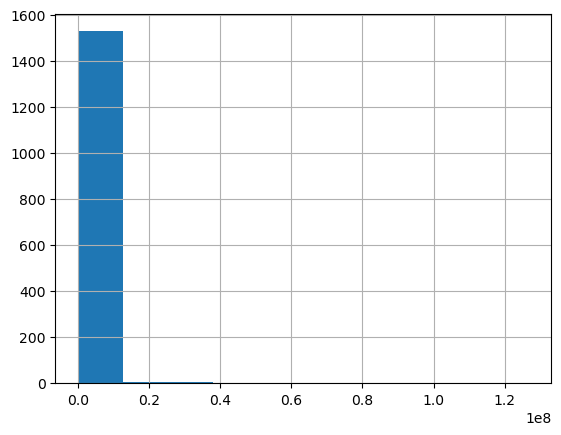

In [11]:
# Watching the behavior of IMPORTE variable
purchases["IMPORTE"].hist()

<AxesSubplot:>

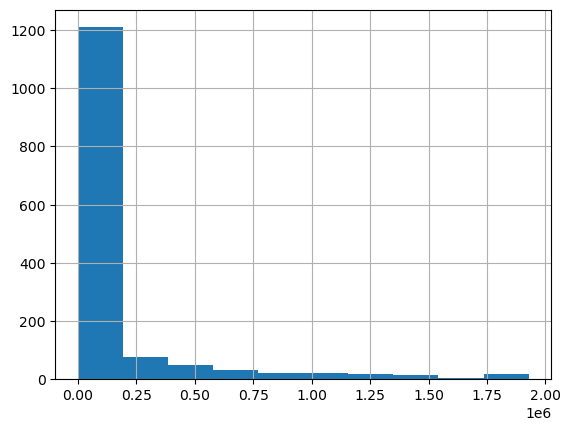

In [12]:
# Excluding the top 5% (taking data until quantile 95) to visualize better the lower values (removing outliers)
purchases[purchases["IMPORTE"] < purchases["IMPORTE"].quantile(0.95)]["IMPORTE"].hist()

<AxesSubplot:>

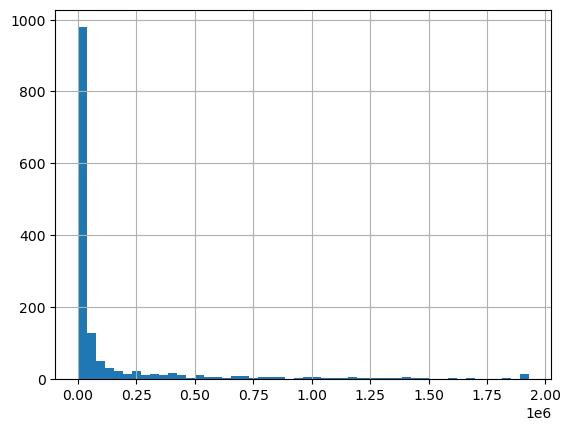

In [13]:
# Same Vis but with more bins for more presition
purchases[purchases["IMPORTE"] < purchases["IMPORTE"].quantile(0.95)]["IMPORTE"].hist(bins=50)

## Multidimensional Analysis

In [14]:
sum_importe_beneficiario = purchases.groupby("BENEFICIARIO").sum()["IMPORTE"]

<AxesSubplot:xlabel='BENEFICIARIO'>

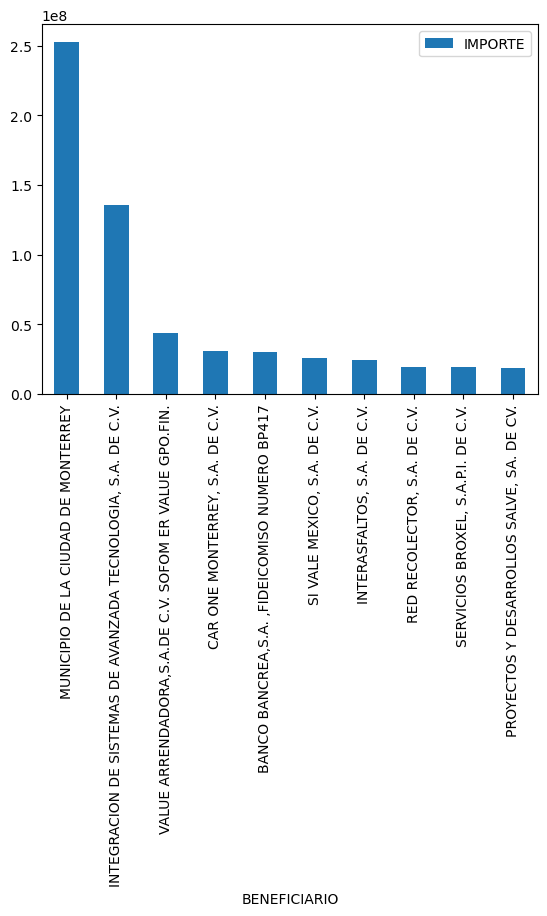

In [15]:
sum_importe_beneficiario.reset_index().sort_values(by="IMPORTE", ascending=False).iloc[0:10].plot(kind="bar", x="BENEFICIARIO", y="IMPORTE")

In [16]:
mean_importe_sheet = purchases.groupby("SHEET").mean()["IMPORTE"]

<AxesSubplot:xlabel='SHEET'>

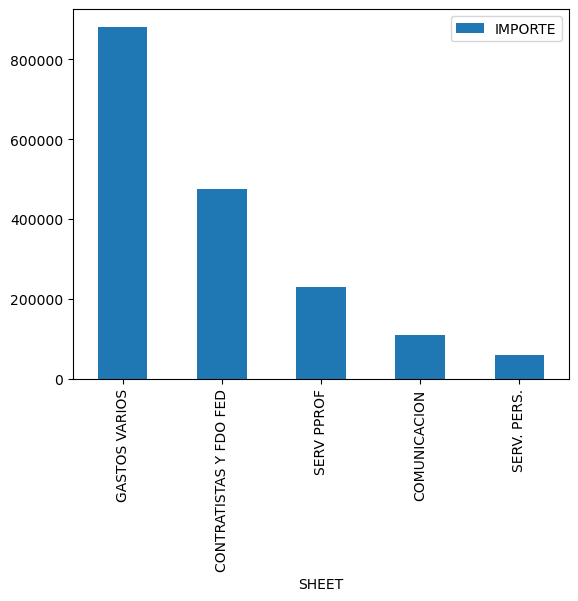

In [17]:
mean_importe_sheet.reset_index().sort_values(by="IMPORTE", ascending=False).iloc[0:10].plot(kind="bar", x="SHEET", y="IMPORTE")

In [18]:
mean_importe_sheet.reset_index().sort_values(by="IMPORTE", ascending=False).iloc[0:10]

,SHEET,IMPORTE
2,GASTOS VARIOS,881659.731797
1,CONTRATISTAS Y FDO FED,474566.765787
3,SERV PPROF,229592.166667
0,COMUNICACION,109705.343662
4,SERV. PERS.,59623.405217


In [19]:
sum_importe_fecha = purchases.groupby("FECHA").sum()["IMPORTE"]
sum_importe_fecha

FECHA
2020-12-01    2.453181e+04
2020-12-02    3.000000e+04
2020-12-03    1.313241e+05
2020-12-04    7.432247e+07
2020-12-07    1.815018e+06
2020-12-08    1.519824e+08
2020-12-09    4.659596e+05
2020-12-10    1.207010e+06
2020-12-11    1.127524e+08
2020-12-14    3.692338e+05
2020-12-15    1.826510e+04
2020-12-16    2.504067e+06
2020-12-17    1.735205e+08
2020-12-18    1.568875e+08
2020-12-21    9.441760e+05
2020-12-22    6.814845e+07
2020-12-23    3.328571e+07
2020-12-28    1.204764e+08
2020-12-29    2.050000e+05
2020-12-30    6.435889e+07
2020-12-31    1.080281e+06
Name: IMPORTE, dtype: float64

In [20]:
purchases_expenses_df = purchases[purchases["SHEET"] == "GASTOS VARIOS"]

<AxesSubplot:>

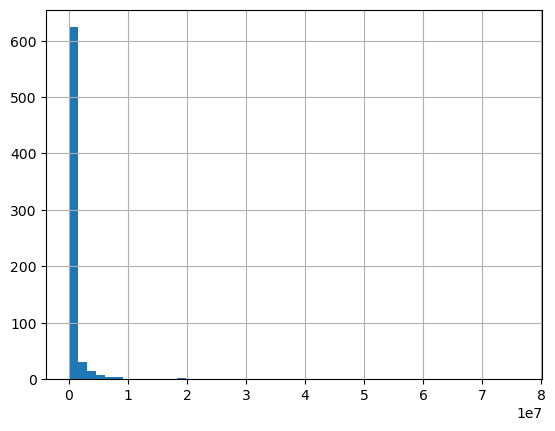

In [21]:
purchases_expenses_df["IMPORTE"].hist(bins=50)

In [22]:
purchases[purchases['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]['SHEET'].value_counts()

GASTOS VARIOS             11
CONTRATISTAS Y FDO FED     5
Name: SHEET, dtype: int64

<AxesSubplot:xlabel='BENEFICIARIO'>

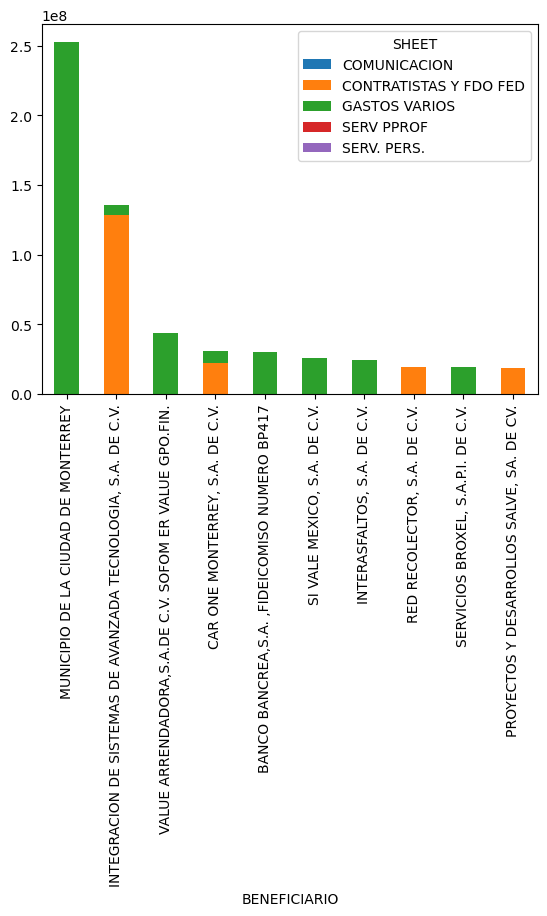

In [23]:
compras_sheet_beneficiario = purchases.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')
top_beneficiarios = purchases.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]
compras_sheet_beneficiario.loc[top_beneficiarios].plot.bar(stacked=True)

## Text Analysis

In [24]:
# Imorting libraries for text analysis
import nltk
from nltk.corpus import stopwords

In [25]:
purchases_text = ""

for row in purchases["CONCEPTO"]:
    purchases_text = purchases_text + " " + row

In [29]:
nltk.download('stopwords')
stopwords_list = stopwords.words("spanish") + ["2020", "cont", "millar", "dpp", "est", "op", "ret", "mty", "icom"]

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alphalejo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
purchases_text = " ".join([x for x in purchases_text.strip().lower().split(" ") if x not in stopwords_list and len(x)>4])

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

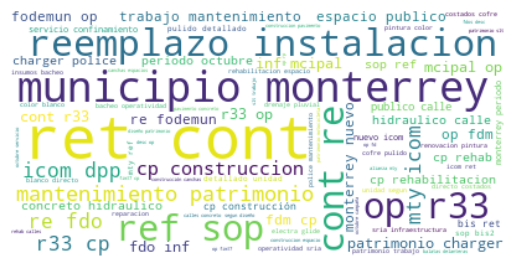

In [38]:
wc = WordCloud(background_color="white")
wc.generate(purchases_text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()